In [28]:
import matplotlib.pyplot as plt
import tikzplotlib
import pickle
import numpy as np

ALGORITHMS = ['random', 'tribler', 'ltr', 'panache', 'dinx', 'dinx_s', 'maay', 'grank']

def tikzplotlib_fix_ncols(obj):
    """Workaround function to fix legend column issue before saving with tikzplotlib."""
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    if hasattr(obj, 'gcf'):
        fig = obj.gcf()
        for ax in fig.get_axes():
            if hasattr(ax, 'legend_') and ax.legend_ is not None:
                if hasattr(ax.legend_, "_ncols"):
                    ax.legend_._ncol = ax.legend_._ncols
    else:
        for child in obj.get_children():
            tikzplotlib_fix_ncols(child)

# Dataset Analysis

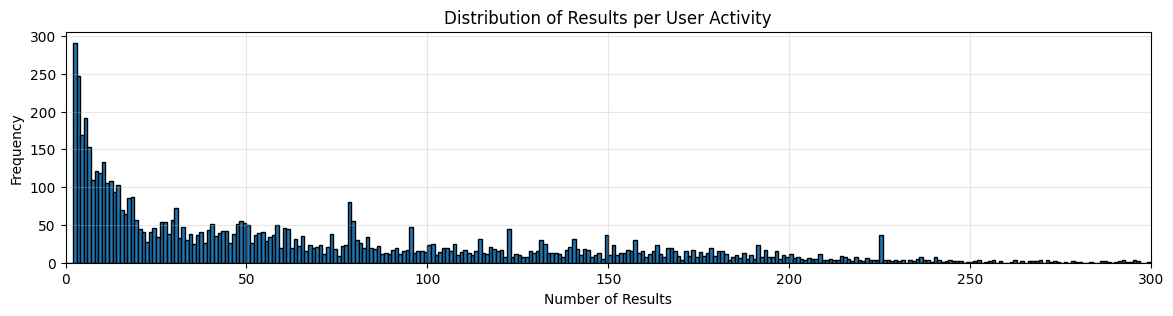

Number of activities with only one result: 707
Percentage of activities with only one result: 10.59%
Mean number of results per activity: 66.99
Median number of results per activity: 44.00


In [29]:
# Plot distribution of results per user activity
plt.figure(figsize=(14, 3))

with open('user_activities.pkl', 'rb') as f:
    user_activities = pickle.load(f)

result_counts = [len(ua.results) for ua in user_activities]

xmax = 300
plt.hist(result_counts, bins=range(xmax+1), edgecolor='black')
plt.xlabel('Number of Results')
plt.ylabel('Frequency') 
plt.title('Distribution of Results per User Activity')
plt.grid(True, alpha=0.3)
plt.xlim(0, xmax)
plt.show()

# Count activities with only one result
single_result_count = sum(1 for ua in user_activities if len(ua.results) < 5)
print(f"Number of activities with only one result: {single_result_count}")
print(f"Percentage of activities with only one result: {single_result_count/len(user_activities)*100:.2f}%")
# Calculate and print mean and median of result counts
mean_results = np.mean(result_counts)
median_results = np.median(result_counts)
print(f"Mean number of results per activity: {mean_results:.2f}")
print(f"Median number of results per activity: {median_results:.2f}")

# Chosen Ranking Positions

In [35]:
with open(f'results/reranked_activities/tribler.pkl', 'rb') as f:
    ltr_act = pickle.load(f)
len(ltr_act)

668

random
tribler
ltr
panache
dinx
dinx_s
maay
grank


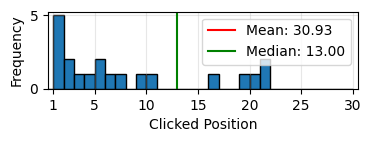

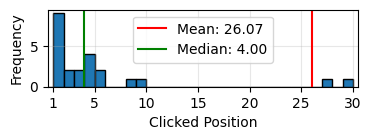

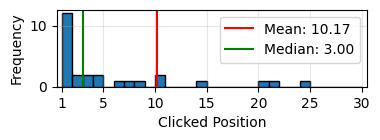

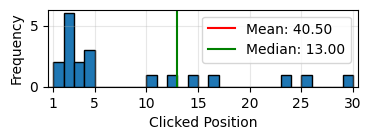

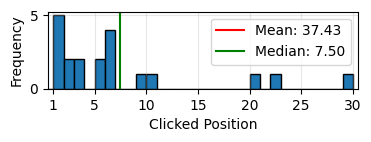

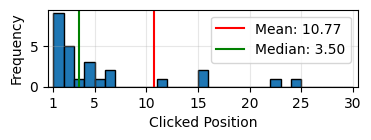

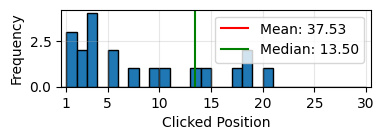

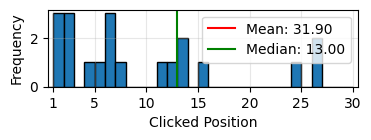

In [32]:
def plot_chosen_indices(ranking_algo):
    with open(f'results/reranked_activities/{ranking_algo}.pkl', 'rb') as f:
        user_activities = pickle.load(f)
        
    chosen_indices = []
    for ua in user_activities:
        if ua.chosen_result is None:
            continue
        try:
            chosen_idx = next(i for i, r in enumerate(ua.results) if r.infohash == ua.chosen_result.infohash) + 1
            chosen_indices.append(chosen_idx)
        except StopIteration:
            # Skip if the chosen result isn't found in results list
            continue

    avg_chosen_index = np.mean(chosen_indices)
    median_chosen_index = np.median(chosen_indices)

    plt.figure(figsize=(4, 1))
    xlimit = 30
    plt.hist([x for x in chosen_indices if x <= xlimit], bins=range(xlimit+1), edgecolor='black')
    plt.axvline(avg_chosen_index, color='red', linestyle='-', label=f'Mean: {avg_chosen_index:.2f}')
    plt.axvline(median_chosen_index, color='green', linestyle='-', label=f'Median: {median_chosen_index:.2f}')
    plt.xlabel('Clicked Position')
    plt.ylabel('Frequency')
    # plt.yscale('log')
    plt.xlim(1, None)
    plt.xlim(0.5, xlimit+0.5)
    plt.xticks([1] + list(range(5, xlimit+1, 5)))
    plt.legend()
    plt.grid(True, alpha=0.3)
    tikzplotlib_fix_ncols(plt)
    tikzplotlib.save(
        f"results/tex/chosen_indices_{ranking_algo.lower()}.tex",
        axis_width=r'\columnwidth',
        axis_height=r'4cm')
    
for algo in ALGORITHMS:
    print(algo)
    plot_chosen_indices(algo)

# Performance with Context Size

{'Tribler': {0: 0.406, 1: 0.356, 2: 0.313, 3: 0.331, 4: 0.294, 5: 0.326, 6: 0.374, 7: 0.359, 8: 0.374, 9: 0.438, 10: 0.363, 11: 0.354, 12: 0.283, 13: 0.347, 14: 0.277, 15: 0.397, 16: 0.36, 17: 0.318, 18: 0.311, 19: 0.417, 20: 0.339, 21: 0.337, 22: 0.34, 23: 0.291, 24: 0.353, 25: 0.349, 26: 0.324, 27: 0.305, 28: 0.319, 29: 0.325, 30: 0.353, 31: 0.383, 32: 0.293, 33: 0.349, 34: 0.32, 35: 0.347, 36: 0.293, 37: 0.284, 38: 0.317, 39: 0.368, 40: 0.417, 41: 0.355, 42: 0.321, 43: 0.365, 44: 0.273, 45: 0.297, 46: 0.296, 47: 0.327, 48: 0.261, 49: 0.273, 50: 0.312, 52: 0.295, 54: 0.288, 56: 0.337, 58: 0.344, 60: 0.338, 62: 0.464, 64: 0.323, 66: 0.329, 68: 0.384, 70: 0.371, 72: 0.264, 74: 0.313, 76: 0.378, 78: 0.37, 80: 0.354, 82: 0.309, 84: 0.35, 86: 0.375, 88: 0.302, 90: 0.312, 92: 0.333, 94: 0.319, 96: 0.299, 98: 0.349, 100: 0.342, 103: 0.311, 106: 0.352, 109: 0.368, 112: 0.414, 115: 0.348, 118: 0.375, 121: 0.387, 124: 0.393, 127: 0.318, 130: 0.334, 133: 0.398, 136: 0.285, 139: 0.282, 142: 0.27

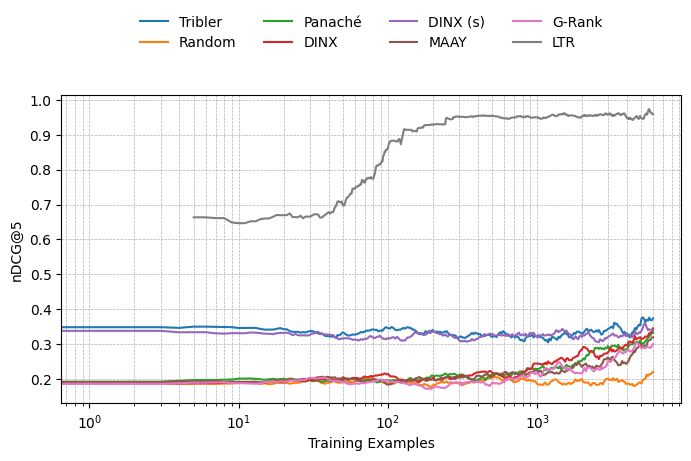

In [18]:
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np

with open('results/context_ndcgs.pkl', 'rb') as f:
    all_ndcgs = pickle.load(f)

with open('results/context_ndcgs_ltr.pkl', 'rb') as f:
    all_ndcgs.update(pickle.load(f))


desired_k = 5
filtered_ndcgs = {}
for algo_name, index_dict in all_ndcgs.items():
    filtered_ndcgs[algo_name] = {x: metrics[desired_k] for x, metrics in index_dict.items() if desired_k in metrics}

all_ndcgs = filtered_ndcgs
print(all_ndcgs)

###############################################################################
# Smoothing Function
###############################################################################

def log_adaptive_moving_average(data, x, min_window, max_window):
    """Apply adaptive smoothing where the window size grows logarithmically with x."""
    smoothed_data = []
    x_min = x[0] if x[0] != 0 else 1e-10  # Avoid division by zero by substituting x[0] with a small value
    for i in range(len(data)):
        # Compute window size based on the logarithm of x
        log_x = np.log(x[i] / x_min + 1)  # Normalize log(x) to avoid log(0)
        max_log_x = np.log(x[-1] / x_min + 1)  # Logarithm of the largest x
        window_size = int(min_window + (max_window - min_window) * (log_x / max_log_x))
        
        # Ensure valid window size (truncate window at array boundary)
        start_idx = max(0, i - window_size // 2)
        end_idx = min(len(data), i + window_size // 2)
        smoothed_data.append(np.mean(data[start_idx:end_idx]))
    return np.array(smoothed_data)

###############################################################################
# Plotting Code
###############################################################################

plt.figure(figsize=(8, 4))
min_window_size = 100
max_window_size = 10

for algo_name, index_dict in all_ndcgs.items():
    # index_dict is now filtered and directly maps x to the desired y values
    x_filtered = sorted(index_dict.keys())
    y_vals = [index_dict[x] for x in x_filtered]
    # Apply adaptive moving average if you want smoothing
    smoothed_vals = log_adaptive_moving_average(y_vals, x_filtered, min_window_size, max_window_size)
    # Plot the smoothed values
    plt.plot(x_filtered, smoothed_vals, label=algo_name)

plt.xscale('log')
plt.xlabel('Training Examples')
plt.ylabel(f'nDCG@{desired_k}' if desired_k is not None else 'nDCG')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.3),  # Increase vertical distance if needed
    ncol=4,
    frameon=False
)

tikzplotlib_fix_ncols(plt)
tikzplotlib.save("ndcg_plot.tex", axis_width=r'\columnwidth', axis_height=r'6cm')

{'Tribler': {0: 0.504, 1: 0.467, 2: 0.432, 3: 0.456, 4: 0.406, 5: 0.434, 6: 0.494, 7: 0.473, 8: 0.477, 9: 0.523, 10: 0.466, 11: 0.456, 12: 0.401, 13: 0.474, 14: 0.406, 15: 0.489, 16: 0.468, 17: 0.44, 18: 0.437, 19: 0.525, 20: 0.455, 21: 0.45, 22: 0.455, 23: 0.422, 24: 0.479, 25: 0.463, 26: 0.446, 27: 0.437, 28: 0.444, 29: 0.446, 30: 0.467, 31: 0.48, 32: 0.419, 33: 0.469, 34: 0.444, 35: 0.459, 36: 0.418, 37: 0.414, 38: 0.441, 39: 0.48, 40: 0.508, 41: 0.456, 42: 0.445, 43: 0.472, 44: 0.393, 45: 0.437, 46: 0.426, 47: 0.437, 48: 0.383, 49: 0.401, 50: 0.447, 52: 0.439, 54: 0.44, 56: 0.449, 58: 0.459, 60: 0.447, 62: 0.542, 64: 0.441, 66: 0.443, 68: 0.496, 70: 0.469, 72: 0.403, 74: 0.445, 76: 0.49, 78: 0.467, 80: 0.462, 82: 0.439, 84: 0.459, 86: 0.483, 88: 0.429, 90: 0.447, 92: 0.451, 94: 0.45, 96: 0.428, 98: 0.458, 100: 0.482, 103: 0.418, 106: 0.463, 109: 0.462, 112: 0.528, 115: 0.468, 118: 0.48, 121: 0.485, 124: 0.493, 127: 0.445, 130: 0.443, 133: 0.49, 136: 0.406, 139: 0.415, 142: 0.396, 1

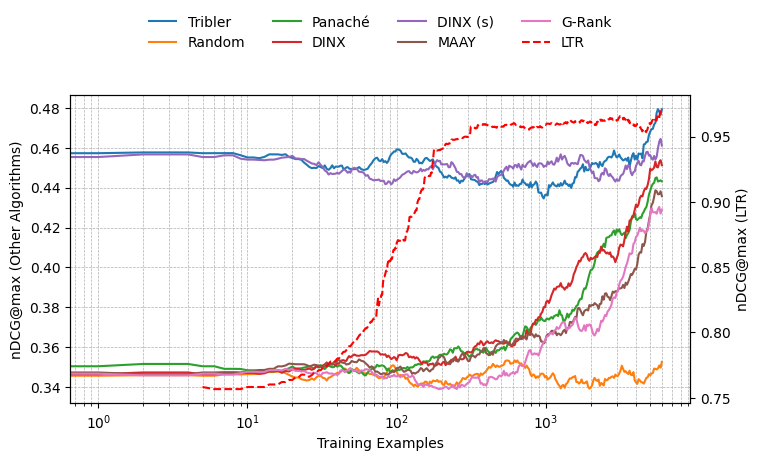

In [19]:
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np

with open('results/context_ndcgs.pkl', 'rb') as f:
    all_ndcgs = pickle.load(f)

with open('results/context_ndcgs_ltr.pkl', 'rb') as f:
    all_ndcgs.update(pickle.load(f))

desired_k = None
filtered_ndcgs = {}
for algo_name, index_dict in all_ndcgs.items():
    filtered_ndcgs[algo_name] = {x: metrics[desired_k] for x, metrics in index_dict.items() if desired_k in metrics}

all_ndcgs = filtered_ndcgs
print(all_ndcgs)

###############################################################################
# Smoothing Function
###############################################################################

def log_adaptive_moving_average(data, x, min_window, max_window):
    """Apply adaptive smoothing where the window size grows logarithmically with x."""
    smoothed_data = []
    x_min = x[0] if x[0] != 0 else 1e-10  # Avoid division by zero by substituting x[0] with a small value
    for i in range(len(data)):
        # Compute window size based on the logarithm of x
        log_x = np.log(x[i] / x_min + 1)  # Normalize log(x) to avoid log(0)
        max_log_x = np.log(x[-1] / x_min + 1)  # Logarithm of the largest x
        window_size = int(min_window + (max_window - min_window) * (log_x / max_log_x))
        
        # Ensure valid window size (truncate window at array boundary)
        start_idx = max(0, i - window_size // 2)
        end_idx = min(len(data), i + window_size // 2)
        smoothed_data.append(np.mean(data[start_idx:end_idx]))
    return np.array(smoothed_data)

###############################################################################
# Plotting Code
###############################################################################

fig, ax1 = plt.subplots(figsize=(8, 4))

# Create second y-axis
ax2 = ax1.twinx()

min_window_size = 200
max_window_size = 20

# Plot non-LTR algorithms on first y-axis
for algo_name, index_dict in all_ndcgs.items():
    if algo_name != 'LTR':
        x_filtered = sorted(index_dict.keys())
        y_vals = [index_dict[x] for x in x_filtered]
        smoothed_vals = log_adaptive_moving_average(y_vals, x_filtered, min_window_size, max_window_size)
        ax1.plot(x_filtered, smoothed_vals, label=algo_name)

# Plot LTR algorithm on second y-axis
if 'LTR' in all_ndcgs:
    x_filtered = sorted(all_ndcgs['LTR'].keys())
    y_vals = [all_ndcgs['LTR'][x] for x in x_filtered]
    smoothed_vals = log_adaptive_moving_average(y_vals, x_filtered, min_window_size, max_window_size)
    ax2.plot(x_filtered, smoothed_vals, label='LTR', color='red', linestyle='--')

ax1.set_xscale('log')  # Set x-axis to logarithmic scale
ax1.set_xlabel('Training Examples')
ax1.set_ylabel(f'nDCG@{desired_k or "max"} (Other Algorithms)')
ax2.set_ylabel(f'nDCG@{desired_k or "max"} (LTR)')

ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Get handles and labels from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Combine legends
ax1.legend(
    lines1 + lines2, labels1 + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.3),
    ncol=4,
    frameon=False
)

# tikzplotlib_fix_ncols(plt)
# tikzplotlib.save("ndcg_plot.tex", axis_width=r'\columnwidth', axis_height=r'6cm')

In [145]:
list(all_ndcgs['LTR'].values())

[0.964,
 0.706,
 0.958,
 0.274,
 0.249,
 0.302,
 0.939,
 0.456,
 0.842,
 0.523,
 0.981,
 0.251,
 0.255,
 0.392,
 0.932,
 0.707,
 0.644,
 0.977,
 0.276,
 0.503,
 0.976,
 0.961,
 0.664,
 0.988,
 0.698,
 0.956,
 0.686,
 0.948,
 0.233,
 0.918,
 0.984,
 0.769,
 0.973,
 0.499,
 0.68,
 0.961,
 0.835,
 0.947,
 0.987,
 0.783,
 0.96,
 0.928,
 0.956,
 0.279,
 0.825,
 0.631,
 0.243,
 0.625,
 0.919,
 0.966,
 0.792,
 0.927,
 0.95,
 0.682,
 0.737,
 0.966,
 0.236,
 0.696,
 0.945,
 0.366,
 0.972,
 0.715,
 0.873,
 0.916,
 0.721,
 0.239,
 0.735,
 0.929,
 0.949,
 0.958,
 0.947,
 0.953,
 0.951,
 0.966,
 0.618,
 0.966,
 0.954,
 0.288,
 0.364,
 0.266,
 0.928,
 0.964,
 0.993,
 0.969,
 0.956,
 0.977,
 0.959,
 0.93,
 0.972,
 0.957,
 0.903,
 0.938,
 0.935,
 0.91,
 0.955,
 0.965,
 0.615,
 0.88,
 0.95,
 0.966,
 0.954,
 0.892,
 0.961,
 0.958,
 0.729,
 0.905,
 0.946,
 0.979,
 0.984,
 0.949,
 0.921,
 0.966,
 0.953,
 0.952,
 0.936,
 0.936,
 0.932,
 0.974,
 0.96,
 0.92,
 0.975,
 0.946,
 0.934,
 0.928,
 0.94,
 0.961,
 0

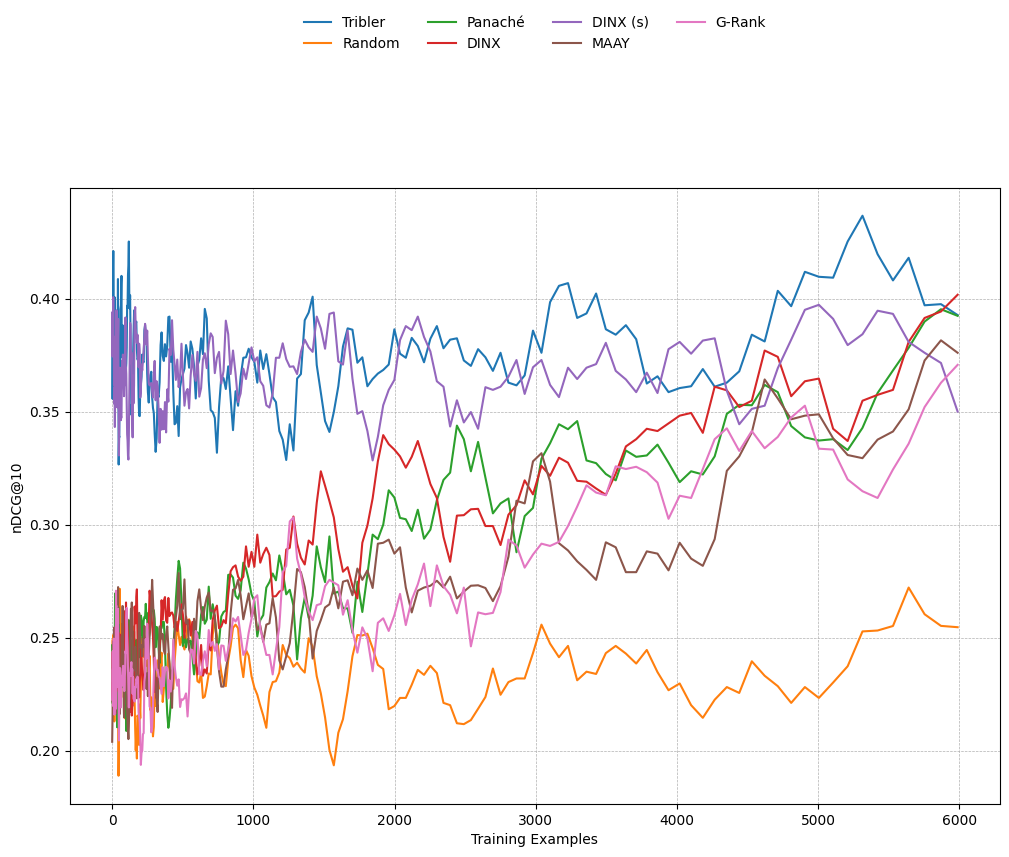

In [126]:
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 8))

for algo_name, index_dict in all_ndcgs.items():
    # Get original x and y values
    x_orig = sorted(index_dict.keys())
    y_orig = [index_dict[x] for x in x_orig]
    
    # Create a pandas Series for easy rolling average
    s = pd.Series(y_orig)
    window = 5  # Adjust window size as needed
    y_smooth = s.rolling(window=window, center=True, min_periods=1).mean()
    
    plt.plot(x_orig, y_smooth, label=algo_name)

plt.xlabel('Training Examples')
plt.ylabel(f'nDCG@{desired_k}' if desired_k is not None else 'nDCG')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.3),
    ncol=4,
    frameon=False
)

# Your existing tikzplotlib fixes and saving
tikzplotlib_fix_ncols(plt)
tikzplotlib.save("ndcg_plot.tex", axis_width=r'\columnwidth', axis_height=r'6cm')